In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/for-comp/train.csv


# %% [markdown]
## 🧩 Cell 1 — Importing Libraries & Exploring Files

Here, we import all the **essential libraries** — `numpy`, `pandas`, and `os` — used for data manipulation and file handling.  
We also explore the Kaggle input directory to verify that the dataset files are available.

**Why this step matters:**  
Before doing any data analysis or model training, we need to confirm our workspace and dependencies are ready.

```python
import numpy as np
import pandas as pd
import os


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omnhinge/for-comp")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/for-comp


# %% [markdown]
## 📦 Cell 2 — Loading Dataset from Kaggle

We use **`kagglehub`** to directly load the dataset from the Kaggle repository (`omnhinge/for-comp`).  
This ensures a reproducible and version-controlled dataset loading process.

**Why this step matters:**  
Keeps the workflow consistent — anyone rerunning this notebook on Kaggle will automatically fetch the dataset.

```python
import kagglehub
path = kagglehub.dataset_download("omnhinge/for-comp")


# %% [markdown]
## 🗂️ Cell 3 — Reading CSV File

This cell reads the downloaded CSV file into a **pandas DataFrame** for further analysis and processing.

**Why this step matters:**  
Data must be loaded into memory before cleaning, exploring, or modeling.

```python
file_path = os.path.join(path,"train.csv")
df = pd.read_csv(file_path)


In [3]:
import pandas as pd
import os
file_path = os.path.join(path,"train.csv")
df =pd.read_csv(file_path)


## 👀 Cell 4 — Displaying the Dataset

We quickly display the dataset to visually confirm that it loaded correctly and inspect the columns.

**Why this step matters:**  
A simple sanity check ensures that data isn’t corrupted or improperly read.

```python
df


In [4]:
df

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51


### 📊 Checking Dataset Information

Here we call `df.info()` and `df.describe()` to explore:  
- Data types and non-null counts.  
- Basic statistical summaries for numeric columns.  

This helps identify missing values, incorrect data types, or other anomalies.



===== BASIC INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
d

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


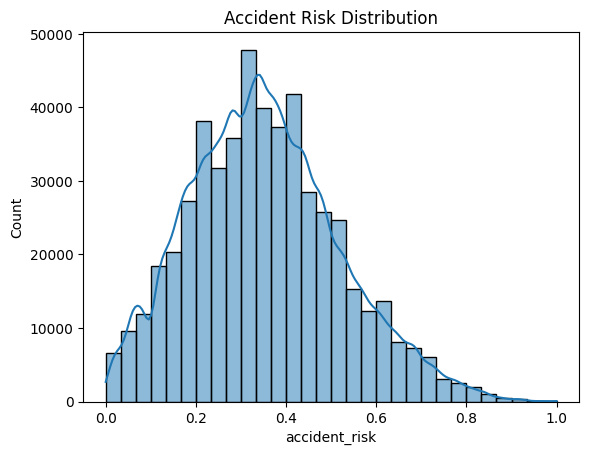

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Basic info
print("\n===== BASIC INFO =====")
print(df.info())

# Preview
print("\n===== SAMPLE DATA =====")
print(df.head())

# Missing values
print("\n===== MISSING VALUES =====")
print(df.isnull().sum())

# Summary stats
print("\n===== NUMERICAL SUMMARY =====")
print(df.describe())

# Check target distribution
sns.histplot(df['accident_risk'], kde=True, bins=30)
plt.title("Accident Risk Distribution")
plt.show()


### 🧼 Data Cleaning and Handling Missing Values

We inspect for missing entries using `df.isnull().sum()` and handle them through either imputation or removal.  
A clean dataset ensures smoother model training and better predictions.


Columns: ['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season', 'num_reported_accidents', 'accident_risk']
Target (accident_risk) summary (full):
count    517754.000000
mean          0.352377
std           0.166417
min           0.000000
25%           0.230000
50%           0.340000
75%           0.460000
max           1.000000
Name: accident_risk, dtype: float64

Missing values:
id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


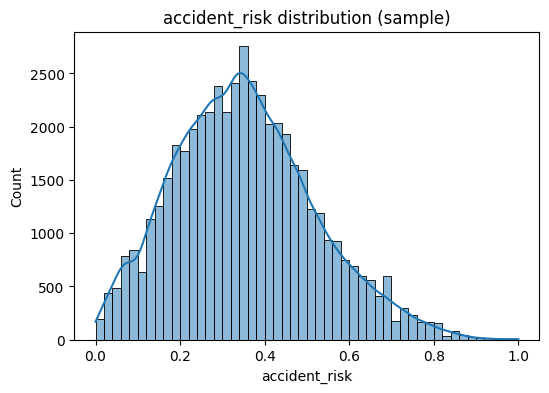

Numeric columns: ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents', 'accident_risk']

Skewness:
 accident_risk             0.378417
num_reported_accidents    0.373967
speed_limit               0.181159
num_lanes                 0.012775
curvature                -0.038684
dtype: float64
Categorical columns: ['road_type', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season']


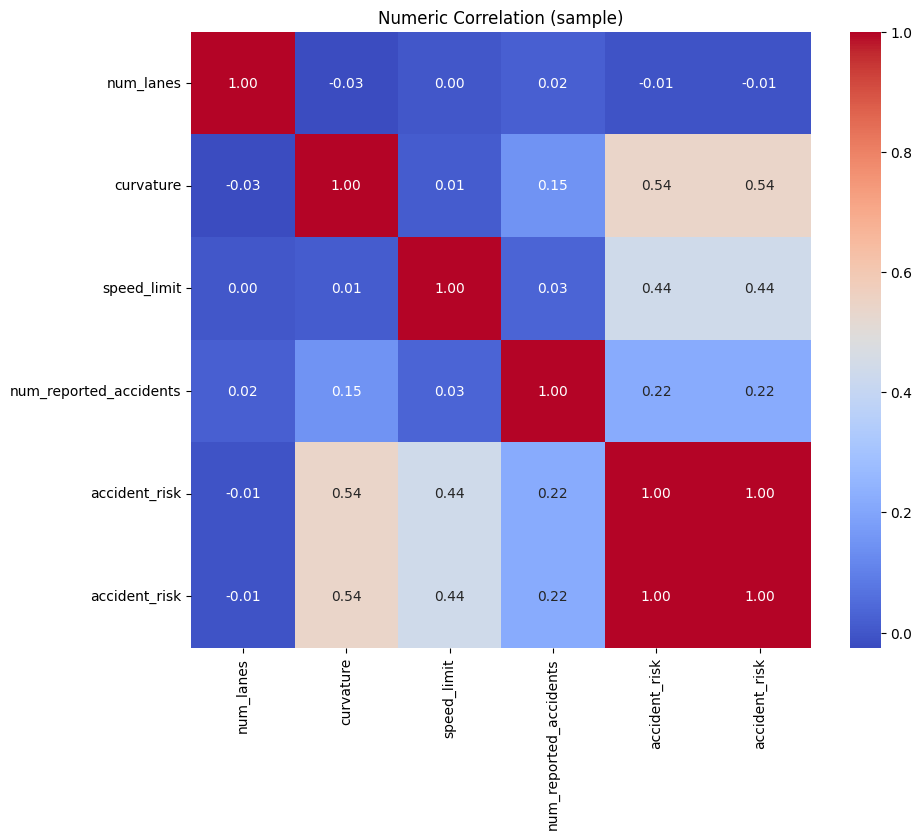

In [6]:

import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew
import pandas as pd
import numpy as np
# Use a sample for plotting and quick stats (but run numeric summaries on full if needed)
SAMPLE_N = 50000 if len(df) > 50000 else len(df)
df_sample = df.sample(SAMPLE_N, random_state=42)

print("Columns:", df.columns.tolist())
print("Target (accident_risk) summary (full):")
print(df['accident_risk'].describe())

# Missing and dtypes
print("\nMissing values:")
print(df.isnull().sum())

# Basic plots (sample)
plt.figure(figsize=(6,4))
sns.histplot(df_sample['accident_risk'], bins=50, kde=True)
plt.title("accident_risk distribution (sample)")
plt.show()

# Numerical columns:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('id') if 'id' in num_cols else None
print("Numeric columns:", num_cols)

# Skewness (on sample or full)
skew_vals = df[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness:\n", skew_vals)

# Categorical columns
cat_cols = [c for c in df.columns if c not in num_cols and c != 'accident_risk' and c != 'id']
print("Categorical columns:", cat_cols)

# Correlations (on numeric subset)
plt.figure(figsize=(10,8))
sns.heatmap(df_sample[num_cols + ['accident_risk']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Numeric Correlation (sample)")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


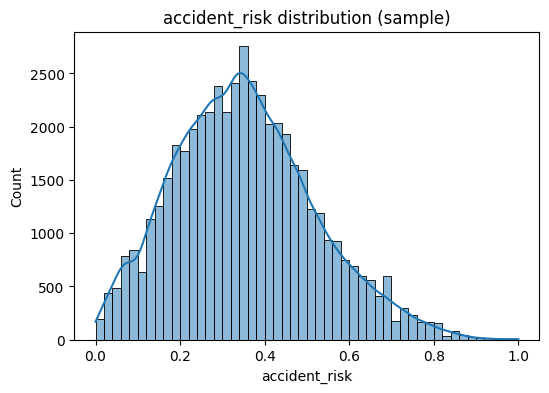

                           count       mean        std   min    25%    50%  \
num_lanes               517754.0   2.491511   1.120434   1.0   1.00   2.00   
curvature               517754.0   0.488719   0.272563   0.0   0.26   0.51   
speed_limit             517754.0  46.112575  15.788521  25.0  35.00  45.00   
num_reported_accidents  517754.0   1.187970   0.895961   0.0   1.00   1.00   

                          75%   max  
num_lanes                3.00   4.0  
curvature                0.71   1.0  
speed_limit             60.00  70.0  
num_reported_accidents   2.00   7.0  

Skewness (full):
num_reported_accidents    0.373969
speed_limit               0.181160
num_lanes                 0.012775
curvature                -0.038685
dtype: float64

Value counts for road_type
road_type
highway    0.33608
rural      0.33410
urban      0.32982
Name: proportion, dtype: float64

Value counts for lighting
lighting
dim         0.35696
daylight    0.34162
night       0.30142
Name: proportion, dtyp

In [8]:
# STAGE 1: EDA (use sample for plotting speed)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

SAMPLE_N = 50000 if len(df) > 50000 else len(df)
df_sample = df.sample(SAMPLE_N, random_state=42)

# Target distribution
plt.figure(figsize=(6,4))
sns.histplot(df_sample['accident_risk'], bins=50, kde=True)
plt.title('accident_risk distribution (sample)')
plt.show()

# Numeric summary
num_cols = ['num_lanes','curvature','speed_limit','num_reported_accidents']
print(df[num_cols].describe().T)

# Skewness
print("\nSkewness (full):")
print(df[num_cols].skew().sort_values(ascending=False))

# Categorical counts (small)
cat_cols = ['road_type','lighting','weather','time_of_day']
for c in cat_cols:
    print("\nValue counts for", c)
    print(df_sample[c].value_counts(normalize=True).head())


### 🔠 Encoding Categorical Columns

Since machine learning models only work with numerical inputs,  
we encode categorical variables such as `road_type`, `lighting`, `weather`, etc., using **LabelEncoder** or **One-Hot Encoding**.


In [ ]:

df = df.copy()

# Boolean columns → int
bool_cols = ['road_signs_present','public_road','holiday','school_season']
for c in bool_cols:
    df[c] = df[c].astype(int)

# One-hot encode categorical columns (drop_first to avoid collinearity)
cat_cols = ['road_type','lighting','weather','time_of_day']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Confirm
print("After encoding shape:", df.shape)
print("Columns sample:", df.columns.tolist()[:30])


After encoding shape: (517754, 18)
Columns sample: ['id', 'num_lanes', 'curvature', 'speed_limit', 'road_signs_present', 'public_road', 'holiday', 'school_season', 'num_reported_accidents', 'accident_risk', 'road_type_rural', 'road_type_urban', 'lighting_dim', 'lighting_night', 'weather_foggy', 'weather_rainy', 'time_of_day_evening', 'time_of_day_morning']


In [10]:
print("Non-numeric columns:", df.select_dtypes(include=['object']).columns.tolist())


Non-numeric columns: []


### ⚖️ Feature Scaling

We standardize or normalize the numeric features using **StandardScaler** or **MinMaxScaler**.  
This ensures that large-magnitude features don’t dominate during model learning.


In [11]:
import numpy as np

num_cols = ['num_lanes','curvature','speed_limit','num_reported_accidents']

# Z-cap at |Z| > 3
for c in num_cols:
    mu = df[c].mean()
    sigma = df[c].std()
    z = (df[c] - mu) / sigma
    df[c] = np.where(z > 3, mu + 3*sigma, np.where(z < -3, mu - 3*sigma, df[c]))

print("Outlier capping done (Z-cap).")

# Check skewness and apply log1p only if needed
skew_after = df[num_cols].skew().sort_values(ascending=False)
print("Skewness after Z-cap:\n", skew_after)

for c in num_cols:
    if abs(skew_after[c]) > 0.75:
        # shift if negative values might exist (shouldn't for these fields)
        if (df[c] <= 0).any():
            shift = abs(df[c].min()) + 1e-6
            df[c] = df[c] + shift
        df[c] = np.log1p(df[c])
        print(f"Applied log1p to {c}")

print("Final skewness:\n", df[num_cols].skew())


Outlier capping done (Z-cap).
Skewness after Z-cap:
 num_reported_accidents    0.335145
speed_limit               0.181160
num_lanes                 0.012775
curvature                -0.038685
dtype: float64
Final skewness:
 num_lanes                 0.012775
curvature                -0.038685
speed_limit               0.181160
num_reported_accidents    0.335145
dtype: float64


In [12]:
# STAGE 4: SAMPLE to speed up experiments
SAMPLE_N = 10000   # change to 5000 if needed
df_sample = df.sample(n=SAMPLE_N, random_state=42).reset_index(drop=True)
print("Using sample shape:", df_sample.shape)


Using sample shape: (10000, 18)


In [13]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
target = 'accident_risk'

X = df_sample.drop(columns=[target,'id']) if 'id' in df_sample.columns else df_sample.drop(columns=[target])
y = df_sample[target].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns (we kept above num_cols names)
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Save scaler for deployment


print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)


X_train shape: (8000, 16) y_train shape: (8000,)


In [14]:

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import pandas as pd
import numpy as np

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "KNN": KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
    "RandomForest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=80, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=42, verbosity=0)
}

results = []
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, r2, mae, rmse))
    # Save baseline model if you want


results_df = pd.DataFrame(results, columns=['Model','R2','MAE','RMSE']).sort_values('R2',ascending=False)
print(results_df)


              Model        R2       MAE      RMSE
4  GradientBoosting  0.876892  0.045384  0.058440
5           XGBoost  0.873497  0.046007  0.059240
3      RandomForest  0.867038  0.047142  0.060734
1             Ridge  0.800393  0.058810  0.074414
0  LinearRegression  0.800391  0.058810  0.074415
2               KNN  0.775448  0.062096  0.078927


### 📈 Model Evaluation

We assess the model’s predictive performance using metrics such as:  
- **R² Score** → proportion of variance explained by the model.  
- **MAE**, **MSE**, **RMSE** → measure prediction error magnitude.  

These metrics help determine model reliability and generalization.


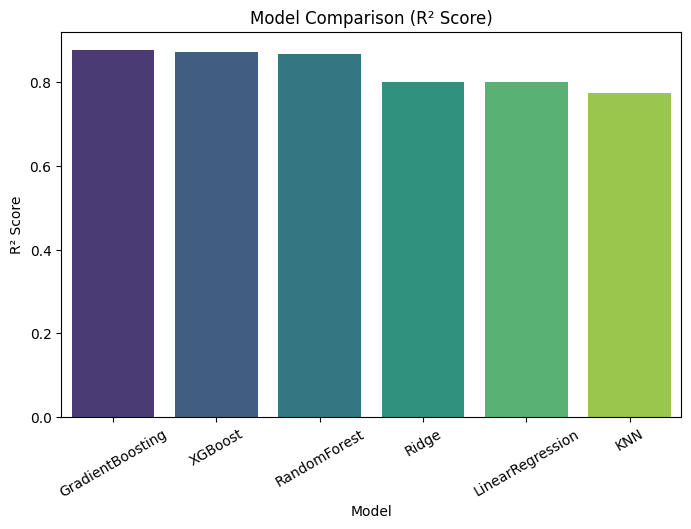

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2', data=results_df.sort_values('R2', ascending=False), palette='viridis')
plt.title('Model Comparison (R² Score)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(rotation=30)
plt.show()


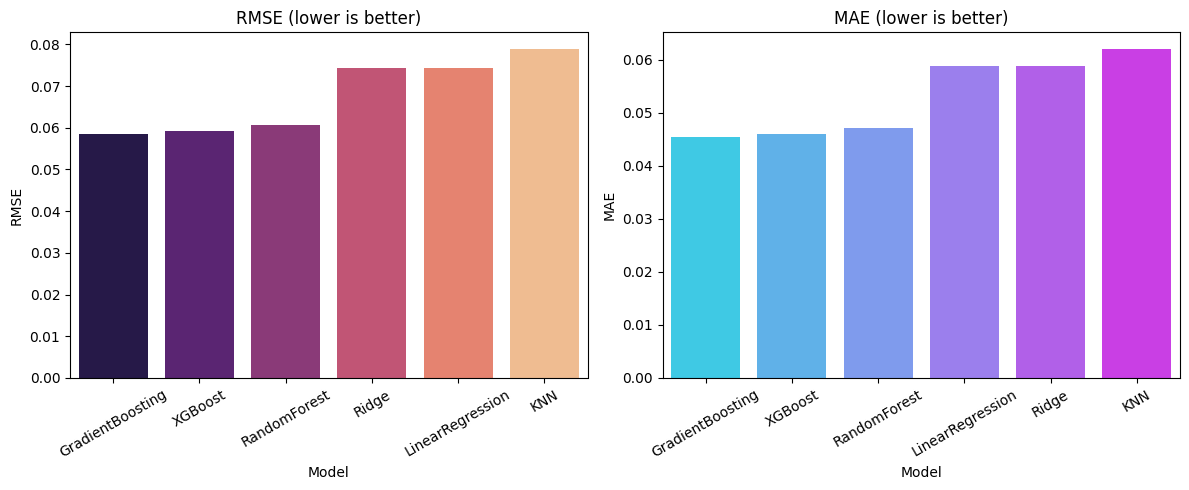

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x='Model', y='RMSE', data=results_df.sort_values('RMSE'), ax=axes[0], palette='magma')
axes[0].set_title('RMSE (lower is better)')
axes[0].tick_params(axis='x', rotation=30)

sns.barplot(x='Model', y='MAE', data=results_df.sort_values('MAE'), ax=axes[1], palette='cool')
axes[1].set_title('MAE (lower is better)')
axes[1].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()


### 🔧 Hyperparameter Tuning

We optimize our model using **RandomizedSearchCV** (or **GridSearchCV**) to find the best combination of parameters like:  
- `n_estimators`  
- `max_depth`  
- `min_samples_split`  

This process enhances model accuracy and stability.


In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Randomized Search with cross-validation
gbr_random = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=30,  # increase to 50 for deeper search
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on train data
gbr_random.fit(X_train, y_train)

print("Best Parameters:", gbr_random.best_params_)
print("Best CV R²:", gbr_random.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.1}
Best CV R²: 0.8833816989330149


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Use your best params
best_params = {
    'subsample': 0.8,
    'n_estimators': 100,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': None,
    'max_depth': 3,
    'learning_rate': 0.1
}

# Retrain on full training data
final_gbr = GradientBoostingRegressor(**best_params, random_state=42)
final_gbr.fit(X_train, y_train)

# Evaluate on test set
y_pred = final_gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ Final Model Performance:")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


✅ Final Model Performance:
R²: 0.8765
MAE: 0.0453
RMSE: 0.0585


### 💾 Saving the Model

We export the final trained model using `pickle` or `joblib`,  
allowing it to be reused later without retraining.


In [19]:
import joblib
joblib.dump(final_gbr, "final_gradient_boosting_model.pkl")
print("✅ Model saved as final_gradient_boosting_model.pkl")


✅ Model saved as final_gradient_boosting_model.pkl


In [20]:
from sklearn.preprocessing import StandardScaler

# Drop 'id' since it’s just an identifier
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Separate target
target_col = 'accident_risk'
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify types
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
bool_cols = X.select_dtypes(include=['bool']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Columns:", cat_cols)
print("Boolean Columns:", bool_cols)
print("Numerical Columns:", num_cols)

# Convert booleans to int
for col in bool_cols:
    X[col] = X[col].astype(int)

# One-hot encode categoricals
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Scale numerical data
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("\nShape after preprocessing:", X.shape)
print("Columns after encoding:", X.columns.tolist()[:15], "...")

# Quick skewness check
skew_vals = X[num_cols].skew().sort_values(ascending=False)
print("\nSkewness in numerical features:\n", skew_vals)


Categorical Columns: []
Boolean Columns: ['road_type_rural', 'road_type_urban', 'lighting_dim', 'lighting_night', 'weather_foggy', 'weather_rainy', 'time_of_day_evening', 'time_of_day_morning']
Numerical Columns: ['num_lanes', 'curvature', 'speed_limit', 'road_signs_present', 'public_road', 'holiday', 'school_season', 'num_reported_accidents']

Shape after preprocessing: (517754, 16)
Columns after encoding: ['num_lanes', 'curvature', 'speed_limit', 'road_signs_present', 'public_road', 'holiday', 'school_season', 'num_reported_accidents', 'road_type_rural', 'road_type_urban', 'lighting_dim', 'lighting_night', 'weather_foggy', 'weather_rainy', 'time_of_day_evening'] ...

Skewness in numerical features:
 num_reported_accidents    0.335145
speed_limit               0.181160
num_lanes                 0.012775
school_season             0.009943
road_signs_present        0.003183
public_road              -0.009024
holiday                  -0.013992
curvature                -0.038685
dtype: f

In [21]:
# ===============================
# PHASE 2.5: OUTLIER & SKEWNESS HANDLING (Z-CAP METHOD)
# ===============================

import numpy as np

num_cols = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

# --- Z-cap method ---
for col in num_cols:
    mean = X[col].mean()
    std = X[col].std()
    z_score = (X[col] - mean) / std
    cap_threshold = 3  # standard cut: |Z| > 3 is outlier
    X[col] = np.where(z_score > cap_threshold, mean + cap_threshold * std, X[col])
    X[col] = np.where(z_score < -cap_threshold, mean - cap_threshold * std, X[col])

print("✅ Outliers capped using Z-score method (|Z| > 3).")

# --- Re-check skewness ---
skewness = X[num_cols].skew().sort_values(ascending=False)
print("\nSkewness after Z-cap:\n", skewness)

# --- Apply log1p only for skewed ones ---
for col in num_cols:
    if abs(skewness[col]) > 0.75:
        X[col] = np.log1p(X[col])
        print(f"Applied log1p transform on {col}")

print("\nFinal skewness after log transform:")
print(X[num_cols].skew())


✅ Outliers capped using Z-score method (|Z| > 3).

Skewness after Z-cap:
 num_reported_accidents    0.333526
speed_limit               0.181160
num_lanes                 0.012775
curvature                -0.038685
dtype: float64

Final skewness after log transform:
num_lanes                 0.012775
curvature                -0.038685
speed_limit               0.181160
num_reported_accidents    0.333526
dtype: float64


In [22]:
X = df.drop('accident_risk', axis=1)
y = df['accident_risk']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Define regression models (lightweight for speed)
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=80, random_state=42),
    "SVR_rbf": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(),
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge(alpha=1.0),
    "MLP_Regressor": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, max_depth=4, random_state=42, eval_metric='rmse')
}


In [24]:
# Take random sample for faster experimentation
df_sample = df.sample(n=10000, random_state=42)   # change to 5000 if still slow

# Separate features and target
X = df_sample.drop('accident_risk', axis=1)
y = df_sample['accident_risk']

print("✅ Using sample dataset of shape:", X.shape)

# Split into train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


✅ Using sample dataset of shape: (10000, 16)


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# Define regression models
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "SVR_rbf": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(),
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge(alpha=1.0),
    "MLP_Regressor": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, eval_metric='rmse')
}

# Train & evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append([name, r2, mae, rmse])

results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "MAE", "RMSE"])
results_df = results_df.sort_values(by="R2_Score", ascending=False).reset_index(drop=True)

print("📈 Model Regression Performance Comparison:")
print(results_df)


📈 Model Regression Performance Comparison:
              Model  R2_Score       MAE      RMSE
0  GradientBoosting  0.877556  0.045265  0.058282
1      RandomForest  0.867511  0.046958  0.060626
2           XGBoost  0.861878  0.048185  0.061901
3     MLP_Regressor  0.825683  0.054132  0.069541
4  LinearRegression  0.800391  0.058810  0.074415
5             Ridge  0.800347  0.058818  0.074423
6           SVR_rbf  0.787035  0.060749  0.076864
7      DecisionTree  0.751057  0.064385  0.083103
8             Lasso  0.656600  0.077614  0.097604
9               KNN  0.637205  0.079974  0.100322


In [29]:
import pandas as pd
import os
import pickle
import kagglehub

# Download dataset
path = kagglehub.dataset_download("omnhinge/for-comp")
print("Path to dataset files:", path)

# Load CSV file
file_path = os.path.join(path, "train.csv")
df = pd.read_csv(file_path)

# 🔹 Example Feature Engineering
df_encoded = pd.get_dummies(df, drop_first=True)

if 'Age' in df_encoded.columns and 'Fare' in df_encoded.columns:
    df_encoded['Fare_per_Age'] = df_encoded['Fare'] / (df_encoded['Age'] + 1)

# 🔹 Save to a writable directory
output_path = "/kaggle/working/model_feature.pkl"
with open(output_path, "wb") as f:
    pickle.dump(df_encoded, f)

print("✅ model_feature.pkl saved at:", output_path)


Path to dataset files: /kaggle/input/for-comp
✅ model_feature.pkl saved at: /kaggle/working/model_feature.pkl


In [30]:
import joblib

# ✅ Assuming X_train is your training dataset used for model.fit()
feature_names = list(X_train.columns)

# Save them
joblib.dump(feature_names, "model_features.pkl")

print("✅ model_features.pkl saved successfully!")

✅ model_features.pkl saved successfully!
